In [51]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Flip, Rotate and Transpose using opencv

In [8]:
img = cv2.imread('Images/buttler.jpg')
# img = cv2.flip(img, 1) # y axis
# img = cv2.flip(img, 0) # x axis
# img = cv2.flip(img, -1) # x,y axis
# img = cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE) # rotation
img = cv2.transpose(img)
cv2.imshow("Opencv",img)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Saving a video using opencv

In [5]:
cap1 = cv2.VideoCapture(0)
f = cv2.VideoWriter_fourcc(*"XVID")
out = cv2.VideoWriter("Images/demooooo.mp4",f,40.0,(640,480)) # 0 after pixel to have black and whte phots
while cap1.isOpened():
    r,frame = cap1.read()
    if r == True:
        # frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        frame = cv2.flip(frame,1)
        out.write(frame)
        cv2.imshow("Opencv",frame)
        if cv2.waitKey(1) & 0xff == ord("p"):
            break
        
    else:
        break
cap1.release()
out.release()
cv2.destroyAllWindows()

# Color Spaces in opencv

- **`Color spaces`** are a way to represent the color channels present in the image that gives the image that particular hue.
-  **BGR color space** : OpenCV's default color space is RGB(0-255)
-  **HSV color space** : It stores color information in a cylindircal representation of RGB color points. Hue value vaires from 0-179, saturation value varies from 0-255 and Value value varies from 0-255
-  **CMYK color space** : Unlike, RGB it is s subtractive color space. The CMYK model works by partially or entirely masking colores on a lighter, usually white, background

# Object Detect

In [8]:
img = cv2.imread("Images/egg.jpg")
def hancy(x):
    pass
cv2.namedWindow("egg")
cv2.createTrackbar("lb","egg",0,255,hancy)
cv2.createTrackbar("lg","egg",0,255,hancy)
cv2.createTrackbar("lr","egg",0,255,hancy)

cv2.createTrackbar("ub","egg",0,255,hancy)
cv2.createTrackbar("ug","egg",0,255,hancy)
cv2.createTrackbar("ur","egg",0,255,hancy)
while True:
    hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    Lb = cv2.getTrackbarPos("lb","egg")
    Lg = cv2.getTrackbarPos("lg","egg")
    Lr = cv2.getTrackbarPos("lr","egg")

    Ub = cv2.getTrackbarPos("ub","egg")
    Ug = cv2.getTrackbarPos("ug","egg")
    Ur = cv2.getTrackbarPos("ur","egg")

    lo = np.array([Lb,Lg,Lr])
    up = np.array([Ub,Ug,Ur])
    masks = cv2.inRange(hsv_img,lo,up)
    res = cv2.bitwise_and(img,img,mask=masks)
    cv2.imshow("res",res)
    cv2.imshow("mask",masks)
    cv2.imshow("hsv",hsv_img)
    cv2.imshow("Opencv",img)
    if cv2.waitKey(25) & 0xff == ord("p"):
            break
    


cv2.destroyAllWindows()

# Filter color with opencv (Live object Filter)

In [10]:
cap = cv2.VideoCapture(0)
def hancy(x):
    pass
cv2.namedWindow("egg")
cv2.createTrackbar("lb","egg",0,255,hancy)
cv2.createTrackbar("lg","egg",0,255,hancy)
cv2.createTrackbar("lr","egg",0,255,hancy)

cv2.createTrackbar("ub","egg",255,255,hancy)
cv2.createTrackbar("ug","egg",255,255,hancy)
cv2.createTrackbar("ur","egg",255,255,hancy)
while cap.isOpened():
    r,frame = cap.read()
    if r == True:
        img = cv2.resize(frame,(400,300)) 
        hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        Lb = cv2.getTrackbarPos("lb","egg")
        Lg = cv2.getTrackbarPos("lg","egg")
        Lr = cv2.getTrackbarPos("lr","egg")
    
        Ub = cv2.getTrackbarPos("ub","egg")
        Ug = cv2.getTrackbarPos("ug","egg")
        Ur = cv2.getTrackbarPos("ur","egg")
    
        lo = np.array([Lb,Lg,Lr])
        up = np.array([Ub,Ug,Ur])
        masks = cv2.inRange(hsv_img,lo,up)
        res = cv2.bitwise_and(img,img,mask=masks)
        cv2.imshow("res",res)
        cv2.imshow("mask",masks)
        cv2.imshow("hsv",hsv_img)
        cv2.imshow("Opencv",img)
        if cv2.waitKey(25) & 0xff == ord("p"):
                break
    else:
        break
cap.release()  
cv2.destroyAllWindows()

# Perspective Transformation Opencv

In [19]:
img = cv2.imread("Images/dhiii.jpg")
# img = cv2.resize(img,(500,500))
cv2.circle(img,(140,34),4,(0,0,255),-1)
cv2.circle(img,(692,92),4,(0,0,255),-1)
cv2.circle(img,(20,650),4,(0,0,255),-1)
cv2.circle(img,(678,698),4,(0,0,255),-1)
print(img.shape)
cv2.imshow("opencv",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(736, 736, 3)


In [18]:
# src1 = np.float32([[140,34],[692,92],[20,650],[678,698]])
# src1

In [20]:
img = cv2.imread("Images/dhiii.jpg")
w,h = (736,736)
src1 = np.float32([[140,34],[692,92],[20,650],[678,698]])
dst1 = np.float32([[0,0],[w,0],[0,h],[w,h]])
m = cv2.getPerspectiveTransform(src1,dst1)
new_img = cv2.warpPerspective(img,m,(w,h))
cv2.imshow("opencv",img)
cv2.imshow("pres",new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Threshold Image

Thresholding is one of the most common (and basic) segmentation techniques in computer vision and it allows us to seperate the foreground(i.e, the objects that we are interested in) from the background of the image. It is the binarization of an image
**Thresholding comes in three forms:**
- Simple Thresholding
- Otsu's Thresholding
- Adaptive Thresholding

In [48]:
img = cv2.imread("Images/mother.jpg")
img = cv2.resize(img,(600,600))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# _,th = cv2.threshold(img,180,255,cv2.THRESH_BINARY)
# _,th = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV)
_,th = cv2.threshold(img,180,255,cv2.THRESH_TRIANGLE)
cv2.imshow("opencv",th)
cv2.imshow("pres",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Otus's Binarization Threshold

In global Thresholding, we used  an arbitray chosen value as a threshold. Otsu's method  avoid having to choose a value and determines it automatically.
Otsu's algorithm tires to find a threshold value(t) which minimizes the weighted within-class variance given by the relation. 
![Otsus](Images/formula.png)

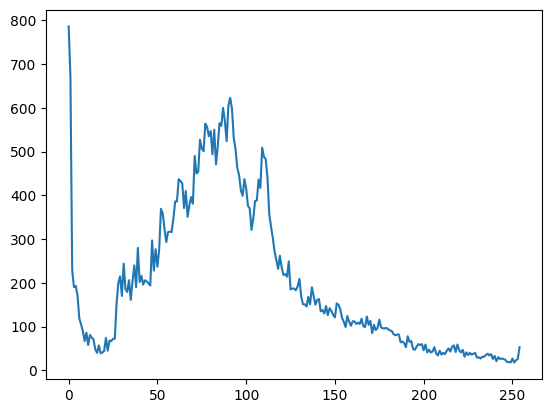

In [56]:
img = cv2.imread("Images/green-leaf-13924003.webp")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([img],[0],None,[255],[0,255])
plt.plot(hist)
plt.show()
cv2.imshow("leaf",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [59]:
img = cv2.imread("Images/green-leaf-13924003.webp")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# hist = cv2.calcHist([img],[0],None,[255],[0,255])
# plt.plot(hist)
# plt.show()
_,th = cv2.threshold(img,200,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow("leaf",img)
cv2.imshow("leafth",th)
cv2.waitKey(0)
cv2.destroyAllWindows()